In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data.csv")
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150.0,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150.0,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140.0,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52.0,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84.0,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79.0,2625,18.6,1982,ford ranger,11.904024


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [4]:
df.isna().sum()  #to check whetehr there are null in horsepower

origin                 0
cylinders              0
displacement           0
horsepower             6
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

### we know that pandas is infering name is object and it is categorical but we know orgin and cylinder are both categorical so we need to convert orgin to category

In [5]:
df.origin = df.origin.astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   origin               398 non-null    category
 1   cylinders            398 non-null    int64   
 2   displacement         398 non-null    float64 
 3   horsepower           392 non-null    float64 
 4   weight               398 non-null    int64   
 5   acceleration         398 non-null    float64 
 6   year                 398 non-null    int64   
 7   name                 398 non-null    object  
 8   Kilometer_per_liter  398 non-null    float64 
dtypes: category(1), float64(4), int64(3), object(1)
memory usage: 25.5+ KB


In [6]:
df.cylinders = df.cylinders.astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   origin               398 non-null    category
 1   cylinders            398 non-null    category
 2   displacement         398 non-null    float64 
 3   horsepower           392 non-null    float64 
 4   weight               398 non-null    int64   
 5   acceleration         398 non-null    float64 
 6   year                 398 non-null    int64   
 7   name                 398 non-null    object  
 8   Kilometer_per_liter  398 non-null    float64 
dtypes: category(2), float64(4), int64(2), object(1)
memory usage: 23.0+ KB


### to drop name and year colunns( coz name is unique in each instant and year does not affect the kmpl)


In [7]:
df1=df.drop(columns=['year','name'],axis=1)
df1

,origin,cylinders,displacement,horsepower,weight,acceleration,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,7.652587
1,1,8,350.0,165.0,3693,11.5,6.377156
2,1,8,318.0,150.0,3436,11.0,7.652587
3,1,8,304.0,150.0,3433,12.0,6.802299
4,1,8,302.0,140.0,3449,10.5,7.227443
...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,11.478880
394,2,4,97.0,52.0,2130,24.6,18.706323
395,1,4,135.0,84.0,2295,11.6,13.604599
396,1,4,120.0,79.0,2625,18.6,11.904024


#### to remove the 6 NAN values in horse power(coz 6 values doesnt affect the whole distribution and it was gn as ? in data and we repleced it with NAN)

In [8]:
drop_NAN=df1[df1['horsepower'].isna()].index   #for dropping the NAn values
drop_NAN

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [9]:
drop=df1.drop(index=drop_NAN,axis=0)
drop

,origin,cylinders,displacement,horsepower,weight,acceleration,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,7.652587
1,1,8,350.0,165.0,3693,11.5,6.377156
2,1,8,318.0,150.0,3436,11.0,7.652587
3,1,8,304.0,150.0,3433,12.0,6.802299
4,1,8,302.0,140.0,3449,10.5,7.227443
...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,11.478880
394,2,4,97.0,52.0,2130,24.6,18.706323
395,1,4,135.0,84.0,2295,11.6,13.604599
396,1,4,120.0,79.0,2625,18.6,11.904024


#### drop is our final cleaned data with no missing values and no columns(name and year)
#df = df.drop(index=df[df['horsepower']=='?'].index,axis=0) alternate way

In [41]:
drop.isna().sum()   #drop is our final cleaned data with no missing values and no columns(name and year)

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
Kilometer_per_liter    0
dtype: int64

## We are finding correlation between 1 dependent and other numerical IDV to test linearity

In [44]:
drop_category=drop.iloc[:,2:7]
drop_category

,displacement,horsepower,weight,acceleration,Kilometer_per_liter
0,307.0,130.0,3504,12.0,7.652587
1,350.0,165.0,3693,11.5,6.377156
2,318.0,150.0,3436,11.0,7.652587
3,304.0,150.0,3433,12.0,6.802299
4,302.0,140.0,3449,10.5,7.227443
...,...,...,...,...,...
393,140.0,86.0,2790,15.6,11.478880
394,97.0,52.0,2130,24.6,18.706323
395,135.0,84.0,2295,11.6,13.604599
396,120.0,79.0,2625,18.6,11.904024


In [45]:
drop_category.corr()

,displacement,horsepower,weight,acceleration,Kilometer_per_liter
displacement,1.000000,0.897257,0.932994,-0.543800,-0.805127
horsepower,0.897257,1.000000,0.864538,-0.689196,-0.778427
weight,0.932994,0.864538,1.000000,-0.416839,-0.832244
acceleration,-0.543800,-0.689196,-0.416839,1.000000,0.423329
Kilometer_per_liter,-0.805127,-0.778427,-0.832244,0.423329,1.000000


<AxesSubplot:>

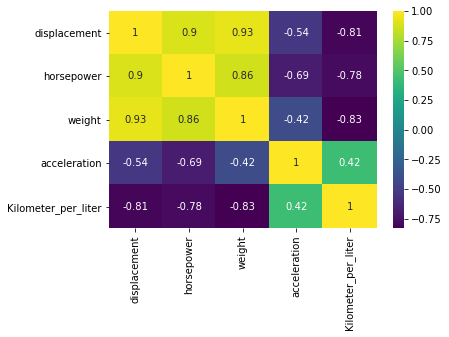

In [46]:
sns.heatmap(drop_category.corr(),annot=True,cmap='viridis')

In [47]:
for i in drop_category:
    r,p=pearsonr(drop_category.Kilometer_per_liter,drop_category[i])
    print(i,r,p)
    if p_value>0.05:
        print("Not Significant.")
    else:
        print("Significant.")
        print()

displacement -0.8051269467334896 1.6606417936100068e-90
Significant.

horsepower -0.7784267839110669 7.031988957280459e-81
Significant.

weight -0.8322442148558429 6.015295897114415e-102
Significant.

acceleration 0.4233285368825963 1.778576132110161e-18
Significant.

Kilometer_per_liter 1.0 0.0
Significant.



### Assigning dependent(y) and independent variable(2 cat and 4 numerical)=(x)

In [11]:
#IDV=independent variables
IDV=drop.iloc[:,0:6]
IDV

,origin,cylinders,displacement,horsepower,weight,acceleration
0,1,8,307.0,130.0,3504,12.0
1,1,8,350.0,165.0,3693,11.5
2,1,8,318.0,150.0,3436,11.0
3,1,8,304.0,150.0,3433,12.0
4,1,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6
394,2,4,97.0,52.0,2130,24.6
395,1,4,135.0,84.0,2295,11.6
396,1,4,120.0,79.0,2625,18.6


In [12]:
#DV= dependent
DV=drop.iloc[:,-1]
DV

0       7.652587
1       6.377156
2       7.652587
3       6.802299
4       7.227443
         ...    
393    11.478880
394    18.706323
395    13.604599
396    11.904024
397    13.179455
Name: Kilometer_per_liter, Length: 392, dtype: float64

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

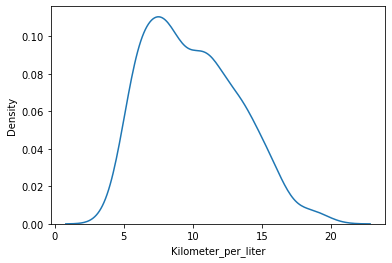

In [48]:
sns.kdeplot(DV)

In [ ]:
s,p=shapiro(num)

### Applying Ttest to check linearity. we have 6 IDV and 1 DV we have to check each IDV with DV

In [13]:
#apply T-test-- pearsonr is used to cal t test
from scipy.stats import pearsonr

In [14]:
pearsonr(drop.origin,drop.Kilometer_per_liter)

(0.5652087566805262, 1.8110802019906616e-34)

In [15]:
r,p=pearsonr(drop.origin,drop.Kilometer_per_liter)
if p>0.05:
    print("Not significant",p)
else:
    print("Significant",p)
    

Significant 1.8110802019906616e-34


In [16]:
r,p=pearsonr(drop.cylinders,drop.Kilometer_per_liter)
if p>0.05:
    print("Not significant",p)
else:
    print("Significant",p)
    

Significant 1.3113836126440812e-80


In [43]:
r,p=pearsonr(drop.displacement,drop.Kilometer_per_liter)
if p>0.05:
    print("Not significant",p)
else:
    print("Significant",p)
    

Significant 1.6606417936100068e-90


In [18]:
r,p=pearsonr(drop.horsepower,drop.Kilometer_per_liter)
if p>0.05:
    print("Not significant",p)
else:
    print("Significant",p)
    

Significant 7.031988957280459e-81


In [19]:
r,p=pearsonr(drop.weight,drop.Kilometer_per_liter)
if p>0.05:
    print("Not significant",p)
else:
    print("Significant",p)
    

Significant 6.015295897114415e-102


In [20]:
r,p=pearsonr(drop.acceleration,drop.Kilometer_per_liter)
if p>0.05:
    print("Not significant",p)
else:
    print("Significant",p)
    

Significant 1.778576132110161e-18


## to check Multicollinearity, we find correlation and for that we will use only Numerical IDV's

In [31]:
#used to check with heatmap
IDV.corr()

,displacement,horsepower,weight,acceleration
displacement,1.000000,0.897257,0.932994,-0.543800
horsepower,0.897257,1.000000,0.864538,-0.689196
weight,0.932994,0.864538,1.000000,-0.416839
acceleration,-0.543800,-0.689196,-0.416839,1.000000


<AxesSubplot:>

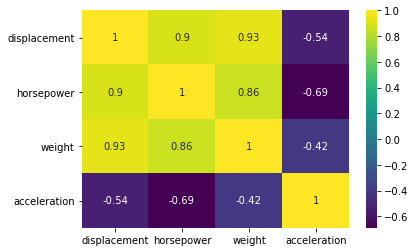

In [32]:
sns.heatmap(IDV.corr(),annot=True,cmap='viridis')

### We checked with IDV alone and multicollinearity exists since all are significant

In [39]:
for i in IDV.select_dtypes(exclude='category'):
    for j in IDV.select_dtypes(exclude='category'):
        r,p = pearsonr(IDV[i],IDV[j])
        print(f'{i} and {j} ------> {r},{p}')  

displacement and displacement ------> 0.9999999999999999,0.0
displacement and horsepower ------> 0.8972570018434691,1.5108887258741506e-140
displacement and weight ------> 0.9329944040890106,3.489083946207091e-175
displacement and acceleration ------> -0.5438004967345673,1.5085401440805055e-31
horsepower and displacement ------> 0.8972570018434691,1.5108887258741506e-140
horsepower and horsepower ------> 1.0,0.0
horsepower and weight ------> 0.8645377375741443,1.3643468773732557e-118
horsepower and acceleration ------> -0.6891955103342364,1.5818862297818033e-56
weight and displacement ------> 0.9329944040890106,3.489083946207091e-175
weight and horsepower ------> 0.8645377375741443,1.3643468773732557e-118
weight and weight ------> 1.0,0.0
weight and acceleration ------> -0.4168392020037066,6.56561570202187e-18
acceleration and displacement ------> -0.5438004967345673,1.5085401440805055e-31
acceleration and horsepower ------> -0.6891955103342364,1.5818862297818033e-56
acceleration and w

In [25]:
for i in IDV.select_dtypes(exclude='category'):
    for j in IDV.select_dtypes(exclude='category'):
        correlation=0
        p_value=0
        if(i!=j):
            print("\nCorrelation between",i,"and",j,":")
            correlation,p_value=pearsonr(IDV[i],IDV[j])  
            print("Correlation = ",correlation,"\nP_value = ",p_value)
            if p_value>0.05:
                print("Not Significant.")
            else:
                print("Significant.")
            print()


Correlation between displacement and horsepower :
Correlation =  0.8972570018434691 
P_value =  1.5108887258741506e-140
Significant.


Correlation between displacement and weight :
Correlation =  0.9329944040890106 
P_value =  3.489083946207091e-175
Significant.


Correlation between displacement and acceleration :
Correlation =  -0.5438004967345673 
P_value =  1.5085401440805055e-31
Significant.


Correlation between horsepower and displacement :
Correlation =  0.8972570018434691 
P_value =  1.5108887258741506e-140
Significant.


Correlation between horsepower and weight :
Correlation =  0.8645377375741443 
P_value =  1.3643468773732557e-118
Significant.


Correlation between horsepower and acceleration :
Correlation =  -0.6891955103342364 
P_value =  1.5818862297818033e-56
Significant.


Correlation between weight and displacement :
Correlation =  0.9329944040890106 
P_value =  3.489083946207091e-175
Significant.


Correlation between weight and horsepower :
Correlation =  0.8645377

### we are going to find correlation between 4 numerical IDVs and 1 Dv. for that we are excluding the categorical values (origin,cylinder) from drop and storing it as drop_cat

doubt? why to do this?

In [27]:
drop_category=drop.iloc[:,2:7]
drop_category

,displacement,horsepower,weight,acceleration,Kilometer_per_liter
0,307.0,130.0,3504,12.0,7.652587
1,350.0,165.0,3693,11.5,6.377156
2,318.0,150.0,3436,11.0,7.652587
3,304.0,150.0,3433,12.0,6.802299
4,302.0,140.0,3449,10.5,7.227443
...,...,...,...,...,...
393,140.0,86.0,2790,15.6,11.478880
394,97.0,52.0,2130,24.6,18.706323
395,135.0,84.0,2295,11.6,13.604599
396,120.0,79.0,2625,18.6,11.904024


In [28]:
drop_category.corr()

,displacement,horsepower,weight,acceleration,Kilometer_per_liter
displacement,1.000000,0.897257,0.932994,-0.543800,-0.805127
horsepower,0.897257,1.000000,0.864538,-0.689196,-0.778427
weight,0.932994,0.864538,1.000000,-0.416839,-0.832244
acceleration,-0.543800,-0.689196,-0.416839,1.000000,0.423329
Kilometer_per_liter,-0.805127,-0.778427,-0.832244,0.423329,1.000000


<AxesSubplot:>

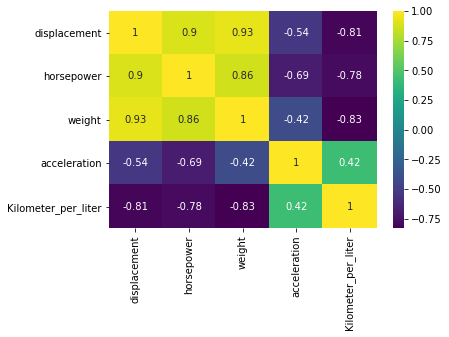

In [29]:
sns.heatmap(drop_category.corr(),annot=True,cmap='viridis')

In [30]:
for i in drop_category:
    r,p=pearsonr(drop_category.Kilometer_per_liter,drop_category[i])
    print(i,r,p)
    if p_value>0.05:
        print("Not Significant.")
    else:
        print("Significant.")
        print()

displacement -0.8051269467334896 1.6606417936100068e-90
Significant.

horsepower -0.7784267839110669 7.031988957280459e-81
Significant.

weight -0.8322442148558429 6.015295897114415e-102
Significant.

acceleration 0.4233285368825963 1.778576132110161e-18
Significant.

Kilometer_per_liter 1.0 0.0
Significant.



In [ ]:
for i in drop_category.select_dtypes(exclude='category'):
    for j in drop_category.select_dtypes(exclude='category'):
        correlation=0
        p_value=0
        if(i!=j):
            print("\nCorrelation between",i,"and",j,":")
            correlation,p_value=pearsonr(drop_category[i],drop_category[j])  
            print("Correlation = ",correlation,"\nP_value = ",p_value)
            if p_value>0.05:
                print("Not Significant.")
            else:
                print("Significant.")
            print()

# Checking VIF

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
IDV_numerical = IDV.select_dtypes(exclude='category')
IDV_numerical.head()

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5


In [71]:
for i in range(len(IDV_numerical.columns)):
    print(f'{IDV_numerical.columns[i]}------>{variance_inflation_factor(IDV_numerical.values,i)}')

displacement------>45.8655942608709
horsepower------>42.01519337024783
weight------>136.44952062802815
acceleration------>20.304705092289847


## To check Normality of errors

#### we are using shapiro because dataselt is below 5000. 
#if >5000 use Anderson ;
As a rule of thumb, we reject the null hypothesis if p < 0.05.

In [50]:
from scipy.stats import anderson,shapiro,kstest
from scipy import stats
shapiro_test = stats.shapiro(drop.Kilometer_per_liter)
shapiro_test

ShapiroResult(statistic=0.967170000076294, pvalue=1.0495841706870124e-07)

In [51]:
s,p=shapiro(drop.Kilometer_per_liter)
if p>0.05:
    print("normally distributed")
else:
    print("Not normally distributed")

Not normally distributed


#### Feature Transformation technique for Normality check ,since the normality cheked using shapiro is not significant
#FT has 4 types where in this case we use LOG TRANSFORMATION

#doubt why we use log??

In [ ]:
np.log10(drop_category.Kilometer_per_liter)

### To build Linear model

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
x=drop.iloc[:,:-1]   #independent variables stored in x
x

,origin,cylinders,displacement,horsepower,weight,acceleration
0,1,8,307.0,130.0,3504,12.0
1,1,8,350.0,165.0,3693,11.5
2,1,8,318.0,150.0,3436,11.0
3,1,8,304.0,150.0,3433,12.0
4,1,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6
394,2,4,97.0,52.0,2130,24.6
395,1,4,135.0,84.0,2295,11.6
396,1,4,120.0,79.0,2625,18.6


In [113]:
y=drop.iloc[:,-1]   #dependent values stored in y
y

0       7.652587
1       6.377156
2       7.652587
3       6.802299
4       7.227443
         ...    
393    11.478880
394    18.706323
395    13.604599
396    11.904024
397    13.179455
Name: Kilometer_per_liter, Length: 392, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)  # test size=30% and train size =70%

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
l=LinearRegression()  #storing LR in variable l

In [ ]:
l.fit(x_train,y_train) #fit x and y train and assign in l

In [ ]:
l.coef_  #y=mx+c ; coeff is m value (wherein m is slope)

In [ ]:
l.intercept_   #intercept is c value

### To find Train RMSE


Things to find: 

Train_pred


Error for train data

KDE Plot

find the mean squared error for train

find the R sqaured value for train 

In [ ]:
train_pred=l.predict(x_train)
train_pred

In [ ]:
error=y_train-train_pred

In [ ]:
error   #error for train data

In [ ]:
sns.kdeplot(error)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
mean_squared_error(train_pred,y_train)

In [ ]:
np.sqrt(mean_squared_error(train_pred,y_train))     #Train RMSE

In [ ]:
r2_score(y_train,train_pred)   # R sq of Train RMSE

### To find Test RMSE


Things to find: 

Test_pred


Error for test data

KDE Plot

find the mean squared error for test

find the R sqaured value for test

In [ ]:
test_pred=l.predict(x_test)
test_pred

In [ ]:
error2=y_test-test_pred

In [ ]:
error2

In [ ]:
sns.kdeplot(error2)

In [ ]:
mean_squared_error(test_pred,y_test)

In [ ]:
np.sqrt(mean_squared_error(test_pred,y_test))   #Test RMSE

In [ ]:
r2_score(y_test,test_pred)    #test r sq

### now check hetroscadacity

In [ ]:
import statsmodels.api as sm

### adding constant in x_train and assigning it in x_train1 to perform matrix multiplication 

note: it cant be added in y(dependent variable)

In [ ]:
x_train1=sm.add_constant(x_train)
x_train1

In [ ]:
model=sm.OLS(y_train,x_train1).fit()


In [40]:
model.summary()

NameError: name 'model' is not defined

In [38]:
for i in drop_category.iloc[:,:-1].columns:
    for j in drop_category.iloc[:,:-1].columns:
        r,p = pearsonr(drop_category[i],drop_category[j])
        print(f'{i} and {j} ------> {r},{p}')

displacement and displacement ------> 0.9999999999999999,0.0
displacement and horsepower ------> 0.8972570018434691,1.5108887258741506e-140
displacement and weight ------> 0.9329944040890106,3.489083946207091e-175
displacement and acceleration ------> -0.5438004967345673,1.5085401440805055e-31
horsepower and displacement ------> 0.8972570018434691,1.5108887258741506e-140
horsepower and horsepower ------> 1.0,0.0
horsepower and weight ------> 0.8645377375741443,1.3643468773732557e-118
horsepower and acceleration ------> -0.6891955103342364,1.5818862297818033e-56
weight and displacement ------> 0.9329944040890106,3.489083946207091e-175
weight and horsepower ------> 0.8645377375741443,1.3643468773732557e-118
weight and weight ------> 1.0,0.0
weight and acceleration ------> -0.4168392020037066,6.56561570202187e-18
acceleration and displacement ------> -0.5438004967345673,1.5085401440805055e-31
acceleration and horsepower ------> -0.6891955103342364,1.5818862297818033e-56
acceleration and w

# Building model with 3IDV and weight as DV from IDV_numerical

In [73]:
IDV_numerical.head()

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5


In [78]:
x1=IDV_numerical[['displacement','horsepower','acceleration']]
x1.head()

,displacement,horsepower,acceleration
0,307.0,130.0,12.0
1,350.0,165.0,11.5
2,318.0,150.0,11.0
3,304.0,150.0,12.0
4,302.0,140.0,10.5


In [77]:
y1=IDV_numerical[['weight']]
y1.head()

,weight
0,3504
1,3693
2,3436
3,3433
4,3449


In [79]:
from sklearn.linear_model import LinearRegression

In [88]:
l=LinearRegression(fit_intercept=False)  #storing LR in variable l

In [89]:
l.fit(x1,y1) #fit x and y train and assign in l

LinearRegression(fit_intercept=False)

In [90]:
l.coef_  #y=mx+c ; coeff is m value (wherein m is slope)

array([[ 5.93038715,  7.74246755, 65.45452908]])

In [91]:
l.intercept_   #intercept is c value

0.0

In [92]:
from sklearn.metrics import mean_squared_error,r2_score

In [93]:
l.score(x1,y1)

0.9023815716172681

In [94]:
r2_score(y1,l.predict(x1))

0.9023815716172681

# OLS

In [95]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [105]:
x2=x1
y2=y1

In [106]:
x2train, x2test, y2train, y2test = train_test_split(x2,y2, test_size=0.3,random_state=28)  # test size=30% and train size =70%

In [110]:
sm.OLS(y2train,sm.add_constant(x2train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     740.3
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          6.59e-130
Time:                        17:44:18   Log-Likelihood:                -1923.7
No. Observations:                 274   AIC:                             3855.
Df Residuals:                     270   BIC:                             3870.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -184.7263    192.170     -0.961      0.337    -563.068     193.616
displacement     5.7608      0.368     15.657      0.000       5.036       6.485
horsepower       8.4720      1.186      7.146      0.000       6.138      10.806
acceleration    74.0795      8.537      8.677      0.000      57.272      90.887
==============================================================================
Omnibus:                      106.940   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1147.157
Skew:                          -1.240   Prob(JB):                    7.91e-250
Kurtosis:                      12.712   Cond. No.                     2.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""